## Applying Different models

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, model_selection
from keras.models import load_model
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pickle
#from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from tensorflow.keras.models import Model
import tensorflow as tf
import pandas as pd
import librosa
import os
from tensorflow.keras.layers import Dense,Input,Conv1D,MaxPooling1D,Activation,Dropout,Flatten
from tensorflow.keras.models import Model

In [4]:
name = [ 'order_number', 
       'add_to_cart_order5', 'time_in_sec5', 
       'add_to_cart_order4', 'time_in_sec4', 
       'add_to_cart_order3', 'time_in_sec3', 
       'add_to_cart_order2', 'time_in_sec2',
       'add_to_cart_order1', 'time_in_sec1',  'reordered_count', 'product_reordered_count',
       'product_name_ratio', 'aisle_ratio', 'department_ratio',
       'dow_ratio',
       'hour_of_day_ratio', 'days_since_prior_ratio', 'reorder_pattern_ratio',
       'new_name_of_day_time_ratio', 'dow_by_user',
       'order_hour_of_day_by_user', 'new_days_since_prior_order_by_user',
       'new_prouse_order_dow', 'new_order_hour_of_day',
       'new_days_since_prior_order', 
       'new_product_count_y','new_product_count_z', 'rank0', 'rank1', 'rank2', 'rank3', 'rank4',
       'rank5', 'rank6', 'time_in_sec', '1', '2', '3', '4', '5', '6', '7', '8',
       'product_count', 'exit1', 'exit2', 'exit3', 'exit4', 'per0', 'per1',
       'per2', 'per3', 'per4', 'per5', 'per6', 'per7', 'per8', 'per9', 'B0', 'B1', 'B2', 'B3', 'B4',
       'reorder_status_5']

In [5]:
train_df = pd.read_csv('train_data.csv',usecols= name)
test_df = pd.read_csv('test_data.csv',usecols= name)
Y = pd.read_csv('Y.csv', usecols= ['reordered'])

In [6]:
train_df.columns

Index(['order_number', 'add_to_cart_order5', 'time_in_sec5',
       'add_to_cart_order4', 'time_in_sec4', 'add_to_cart_order3',
       'time_in_sec3', 'add_to_cart_order2', 'time_in_sec2',
       'add_to_cart_order1', 'time_in_sec1', 'reordered_count',
       'product_reordered_count', 'product_name_ratio', 'aisle_ratio',
       'department_ratio', 'dow_ratio', 'hour_of_day_ratio',
       'days_since_prior_ratio', 'reorder_pattern_ratio',
       'new_name_of_day_time_ratio', 'dow_by_user',
       'order_hour_of_day_by_user', 'new_days_since_prior_order_by_user',
       'new_prouse_order_dow', 'new_order_hour_of_day',
       'new_days_since_prior_order', 'new_product_count_y',
       'new_product_count_z', 'rank0', 'rank1', 'rank2', 'rank3', 'rank4',
       'rank5', 'rank6', 'time_in_sec', '1', '2', '3', '4', '5', '6', '7', '8',
       'product_count', 'exit1', 'exit2', 'exit3', 'exit4', 'per0', 'per1',
       'per2', 'per3', 'per4', 'per5', 'per6', 'per7', 'per8', 'per9', 'B0',
       

In [6]:
Y = Y.to_numpy()
Y = Y.ravel()

In [7]:
train_df = train_df.fillna(0)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_df, Y, test_size=0.33, random_state=7)

## Applying Logistic Regression

C =  0.001 Train Score 0.1731899921910676 test Score 0.17308411496439677
C =  0.01 Train Score 0.1731899921910676 test Score 0.17308411496439677
C =  0.1 Train Score 0.1731899921910676 test Score 0.17308411496439677
C =  1 Train Score 0.1731899921910676 test Score 0.17308411496439677
C =  10 Train Score 0.1731899921910676 test Score 0.17308411496439677
C =  100 Train Score 0.1731899921910676 test Score 0.17308411496439677


Text(0.5, 1.0, 'C vs score at max_iter of 200')

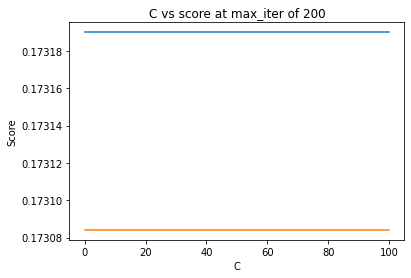

In [ ]:
C=[10 ** x for x in range(-3, 3)]
train_scores = []
test_scores = []
for i in C:
    model = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0, C = i,n_jobs = -1)
    model.fit(X_train,y_train)
    train_sc = f1_score(y_train,model.predict(X_train))
    test_sc = f1_score(y_test,model.predict(X_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('C = ',i,'Train Score',train_sc,'test Score',test_sc)

plt.plot(C,train_scores,label='Train Score')
plt.plot(C,test_scores,label='Test Score')
plt.xlabel('C')
plt.ylabel('Score')
plt.title('C vs score at max_iter of 200')

In [ ]:
#for every value of C , train and test score is same.
model = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0, C = 0.1,n_jobs = -1)
model.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='saga', tol=0.01, verbose=0, warm_start=False)

In [ ]:

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,model.predict(X_train)))
print('Test f1 score',f1_score(y_test,model.predict(X_test)))

Train f1 score 0.1731899921910676
Test f1 score 0.17308411496439677


Train confusion_matrix


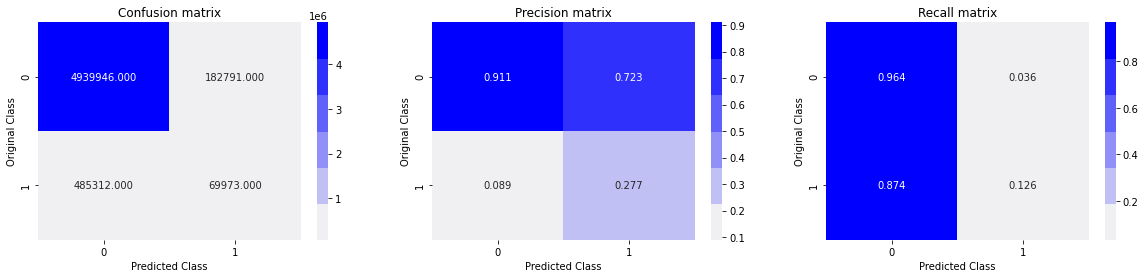

Test confusion_matrix


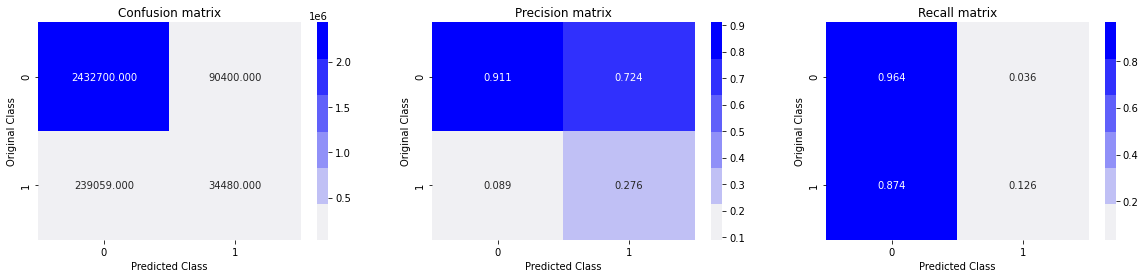

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,model.predict(X_train))
print('Test confusion_matrix')
plot_confusion_matrix(y_test,model.predict(X_test))

In [ ]:
# save the model to disk
import pickle
filename = 'finalized_model1.sav'
pickle.dump(model, open(filename, 'wb'))

## Applying CatBoost Classifier

In [ ]:
learning_rate = [0.001,0.01,0.1]
max_depth = [5,10,15]

#Loop for the Tuning
for lr in learning_rate:
    for n in max_depth:
        clf = CatBoostClassifier(learning_rate=lr,max_depth = n,task_type = "GPU",verbose = False)

        clf.fit(X_train,y_train)

        #y_pred = (clf.predict_proba(X_test)[:, 1] >= 0.21).astype('int')
        Y_pred = clf.predict(X_train)
        y_pred = clf.predict(X_test)
        print(f'Train f1 score at learning rate {lr} and max_depth {n} is {f1_score(y_train, Y_pred)}')
        print(f'Test f1 score at learning rate {lr} and max_depth {n} is {f1_score(y_test, y_pred)}')
        print("-"*50)


Train f1 score at learning rate 0.001 and max_depth 5 is 0.23234992337734411
Test f1 score at learning rate 0.001 and max_depth 5 is 0.2318008120372582
--------------------------------------------------
Train f1 score at learning rate 0.001 and max_depth 10 is 0.2657429525630353
Test f1 score at learning rate 0.001 and max_depth 10 is 0.2646232779537545
--------------------------------------------------
Train f1 score at learning rate 0.001 and max_depth 15 is 0.28551359204913884
Test f1 score at learning rate 0.001 and max_depth 15 is 0.2745714211985583
--------------------------------------------------
Train f1 score at learning rate 0.01 and max_depth 5 is 0.2774344179616136
Test f1 score at learning rate 0.01 and max_depth 5 is 0.2770052833470161
--------------------------------------------------
Train f1 score at learning rate 0.01 and max_depth 10 is 0.2887284888647413
Test f1 score at learning rate 0.01 and max_depth 10 is 0.2830944380846891
-------------------------------------

In [ ]:
n_estimators = [100,500,1000,1500]
class_weights = [{0:1,1:2},{0:1,1:4},{0:1,1:6}]

#Loop for the Tuning
for n in n_estimators:
    for l in class_weights:
        clf = CatBoostClassifier(learning_rate=0.1,max_depth = 15,n_estimators = n,class_weights = l,task_type = "GPU",verbose = False)
        clf.fit(X_train,y_train)

        #y_pred = (clf.predict_proba(X_test)[:, 1] >= 0.21).astype('int')
        Y_pred = clf.predict(X_train)
        y_pred = clf.predict(X_test)
        print(f'Train f1 score at n_estimators {n} and class_weights {l} is {f1_score(y_train, Y_pred)}')
        print(f'Test f1 score at n_estimators {n} and  class_weights {l} is {f1_score(y_test, y_pred)}')
        print("-"*50)

Train f1 score at n_estimators 100 and class_weights {0: 1, 1: 2} is 0.48564181386947025
Test f1 score at n_estimators 100 and  class_weights {0: 1, 1: 2} is 0.39856651828478057
--------------------------------------------------
Train f1 score at n_estimators 100 and class_weights {0: 1, 1: 4} is 0.4973562540851148
Test f1 score at n_estimators 100 and  class_weights {0: 1, 1: 4} is 0.43822660290057935
--------------------------------------------------
Train f1 score at n_estimators 100 and class_weights {0: 1, 1: 6} is 0.4668001546094527
Test f1 score at n_estimators 100 and  class_weights {0: 1, 1: 6} is 0.4217710437020103
--------------------------------------------------
Train f1 score at n_estimators 500 and class_weights {0: 1, 1: 2} is 0.6993658221738176
Test f1 score at n_estimators 500 and  class_weights {0: 1, 1: 2} is 0.3777813754386633
--------------------------------------------------
Train f1 score at n_estimators 500 and class_weights {0: 1, 1: 4} is 0.7364857541314104
T

In [ ]:
clf = CatBoostClassifier(learning_rate=0.1,max_depth = 15,n_estimators = 100,class_weights ={0: 1, 1: 4},task_type = "GPU",verbose = False)
clf.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,clf.predict(X_train)))
print('Test f1 score',f1_score(y_test,clf.predict(X_test)))

Train f1 score 0.4973562540851148
Test f1 score 0.43822660290057935


Train confusion_matrix


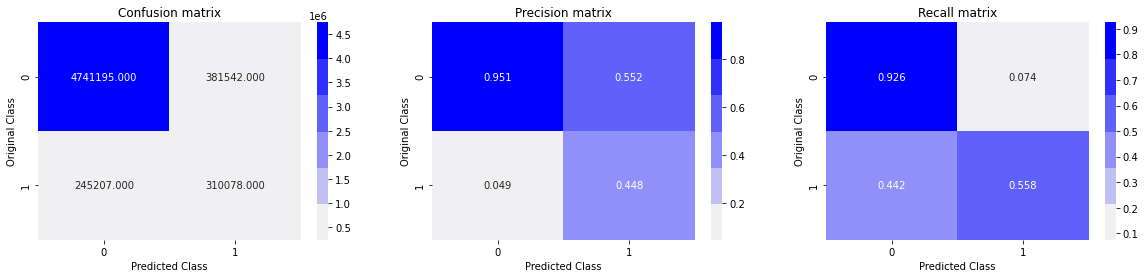

Test confusion_matrix


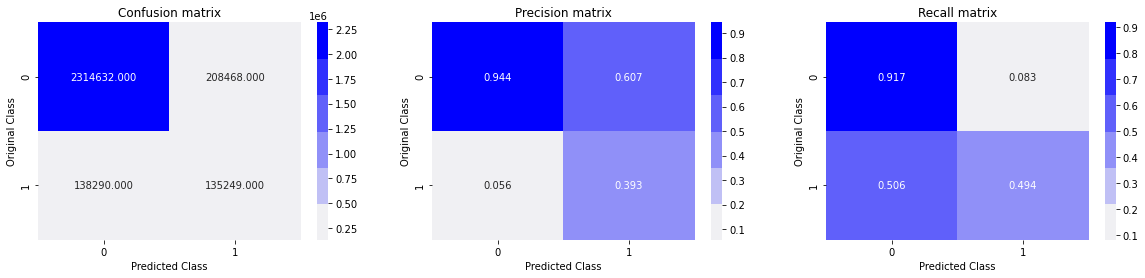

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,clf.predict(X_train))
print('Test confusion_matrix')
plot_confusion_matrix(y_test,clf.predict(X_test))

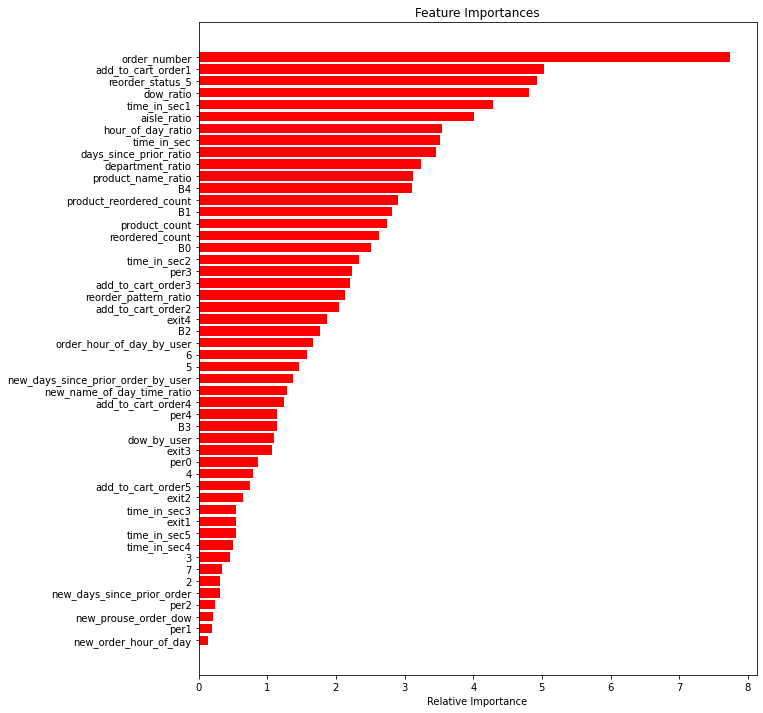

In [ ]:
features = train_df.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-50:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# save the model to disk
import pickle
filename = 'finalized_model2.sav'
pickle.dump(clf, open(filename, 'wb'))

## Applying RandomForest Classifier

Estimators =  10 Train Score 0.17713845090270947 test Score 0.17545809647813523
Estimators =  50 Train Score 0.17841238049040012 test Score 0.17737976150780418
Estimators =  100 Train Score 0.18152436541968173 test Score 0.18080998620061023
Estimators =  250 Train Score 0.1835702465443778 test Score 0.18294824340883536
Estimators =  450 Train Score 0.18332028032566602 test Score 0.18256367490183814


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

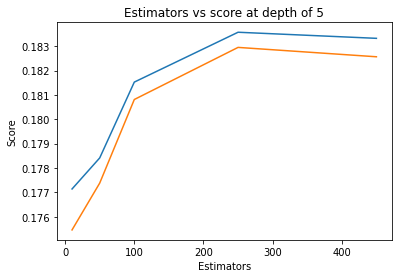

In [ ]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train))
    test_sc = f1_score(y_test,clf.predict(X_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

In [ ]:
#from above plot , at n_estimators=250 gives best result
clf_random = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
clf_random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=52, min_samples_split=120,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [ ]:
print('Train f1 score',f1_score(y_train,clf_random.predict(X_train)))
print('Test f1 score',f1_score(y_test,clf_random.predict(X_test)))

Train f1 score 0.1835702465443778
Test f1 score 0.18294824340883536


Train confusion_matrix


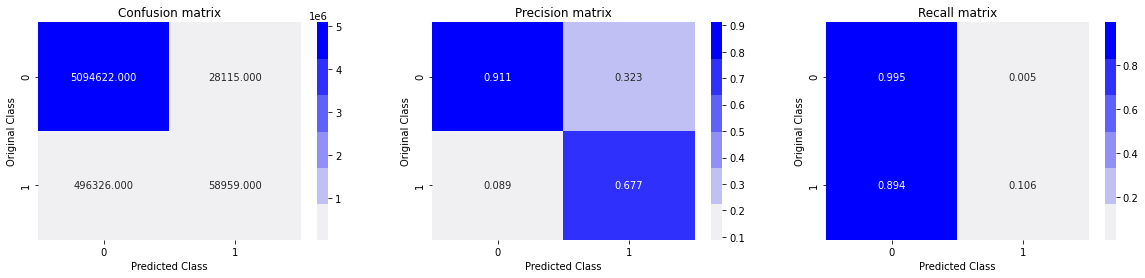

Test confusion_matrix


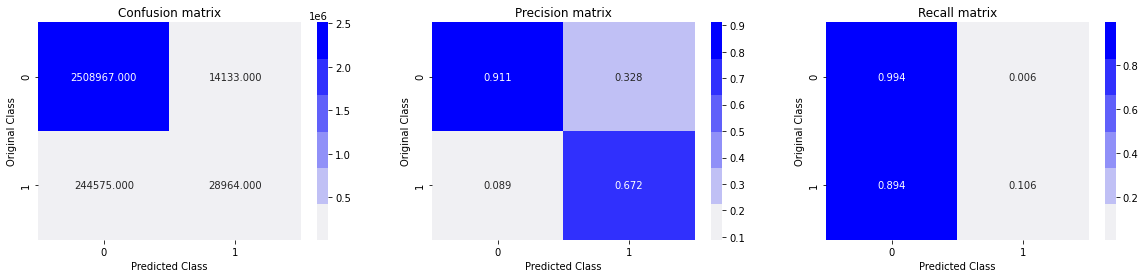

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,clf_random.predict(X_train))
print('Test confusion_matrix')
plot_confusion_matrix(y_test,clf_random.predict(X_test))

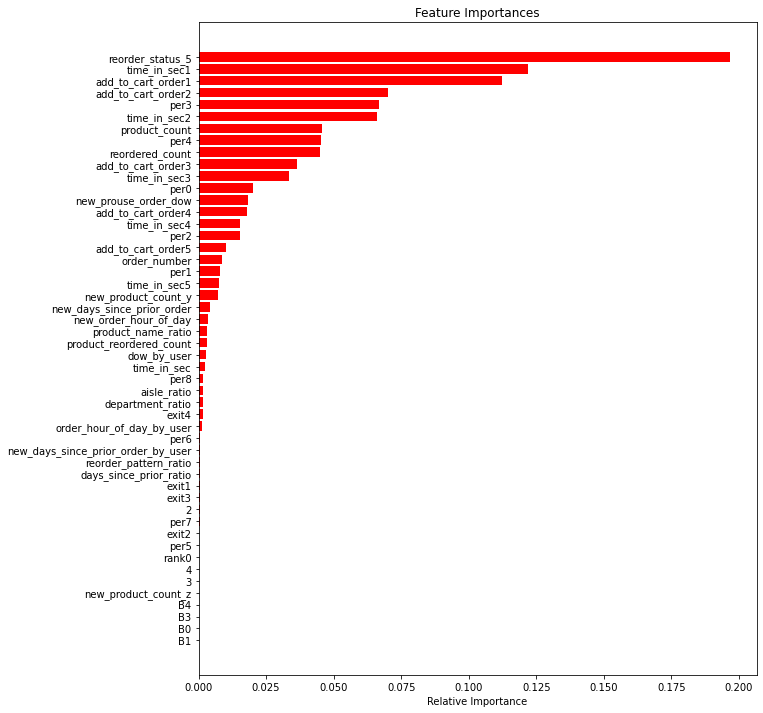

In [ ]:
features = train_df.columns
importances = clf_random.feature_importances_
indices = (np.argsort(importances))[-50:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# save the model to disk
import pickle
filename = 'finalized_model3.sav'
pickle.dump(clf_random, open(filename, 'wb'))

# Applying XGBOOST

In [ ]:
clf_gb = xgb.XGBClassifier(n_jobs=-1) 
distributions = dict(learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],n_estimators = [5,10,50, 75, 100, 200]) 

xgb_Randomized = RandomizedSearchCV(clf_gb,param_distributions=distributions,scoring='f1',return_train_score=True,cv=3)
xgb_Randomized.fit(X_train,y_train)
xgb_Randomized.best_params_

[02:09:50] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


{'learning_rate': 0.3, 'n_estimators': 200}

In [ ]:
xgb_Randomized = xgb.XGBClassifier(learning_rate=0.3, n_estimators=200, n_jobs=-1)

xgb_Randomized.fit(X_train,y_train)

[21:16:47] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,xgb_Randomized.predict(X_train)))
print('Test f1 score',f1_score(y_test,xgb_Randomized.predict(X_test)))

Train f1 score 0.2877576212215788
Test f1 score 0.2857004992719542


Train confusion_matrix


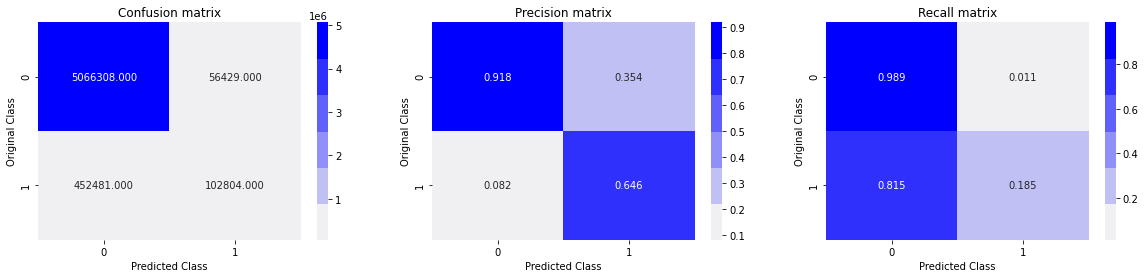

Test confusion_matrix


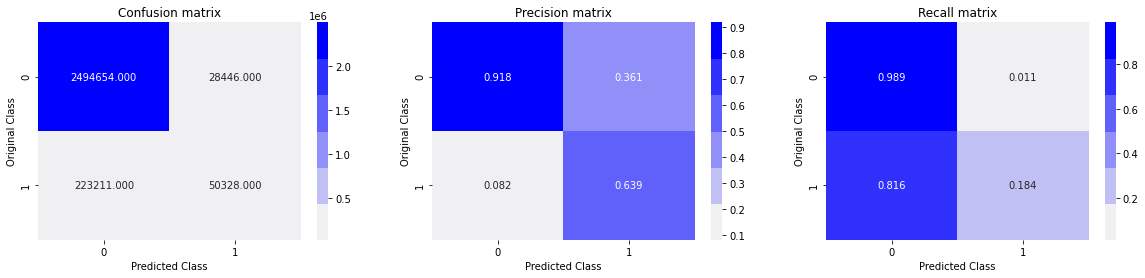

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,xgb_Randomized.predict(X_train))
print('Test confusion_matrix')
plot_confusion_matrix(y_test,xgb_Randomized.predict(X_test))

In [ ]:
# save the model to disk
import pickle
filename = 'finalized_model4.sav'
pickle.dump(xgb_Randomized, open(filename, 'wb'))

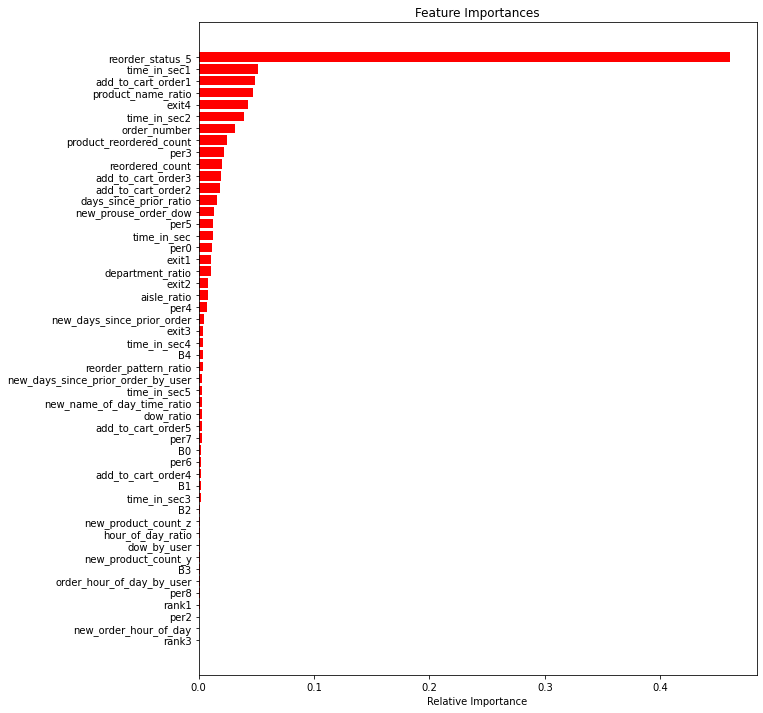

In [ ]:
features = train_df.columns
importances = xgb_Randomized.feature_importances_
indices = (np.argsort(importances))[-50:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Applying lgbm classifier

In [ ]:
lgbm=lgb.LGBMClassifier(n_jobs=-1)
prams={
    'learning_rate':[0.001,0.01,0.1],
     'n_estimators':[100,500,1000,1500],
     'max_depth':[5,10,15,20],
     'num_leaves':[25,50,75],
     'class_weight':[{0:1,1:2},{0:1,1:4},{0:1,1:6}],
}
lgbm_cfl1=RandomizedSearchCV(lgbm,param_distributions=prams,scoring='f1',return_train_score=True,cv=3)
lgbm_cfl1.fit(X_train,y_train)
lgbm_cfl1.best_params_

{'class_weight': {0: 1, 1: 4},
 'learning_rate': 0.1,
 'max_depth': 15,
 'n_estimators': 1000,
 'num_leaves': 75}

In [ ]:
lgbm=lgb.LGBMClassifier(class_weight={0:1,1:4},learning_rate=0.1,max_depth=15,n_estimators=1000,num_leaves=75,random_state=0)
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight={0: 1, 1: 4},
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=15, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=-1, num_leaves=75,
               objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,lgbm.predict(X_train)))
print('Test f1 score',f1_score(y_test,lgbm.predict(X_test)))

Train f1 score 0.4665766693810759
Test f1 score 0.44187727674179583


Train confusion_matrix


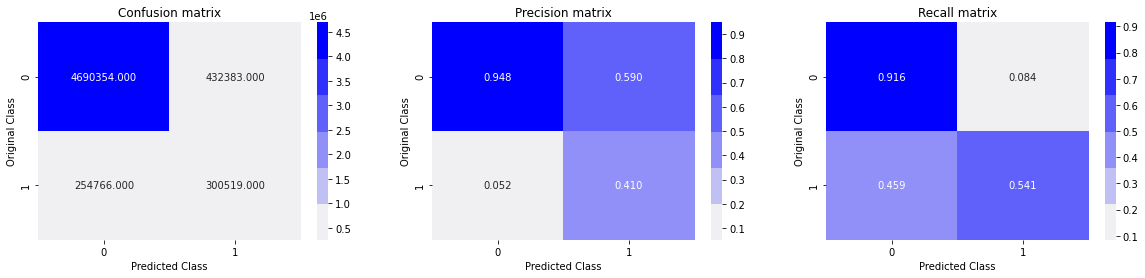

Test confusion_matrix


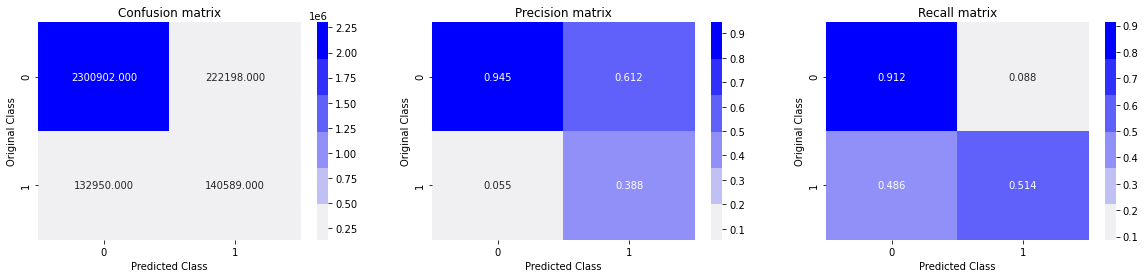

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,lgbm.predict(X_train))
print('Test confusion_matrix')
plot_confusion_matrix(y_test,lgbm.predict(X_test))

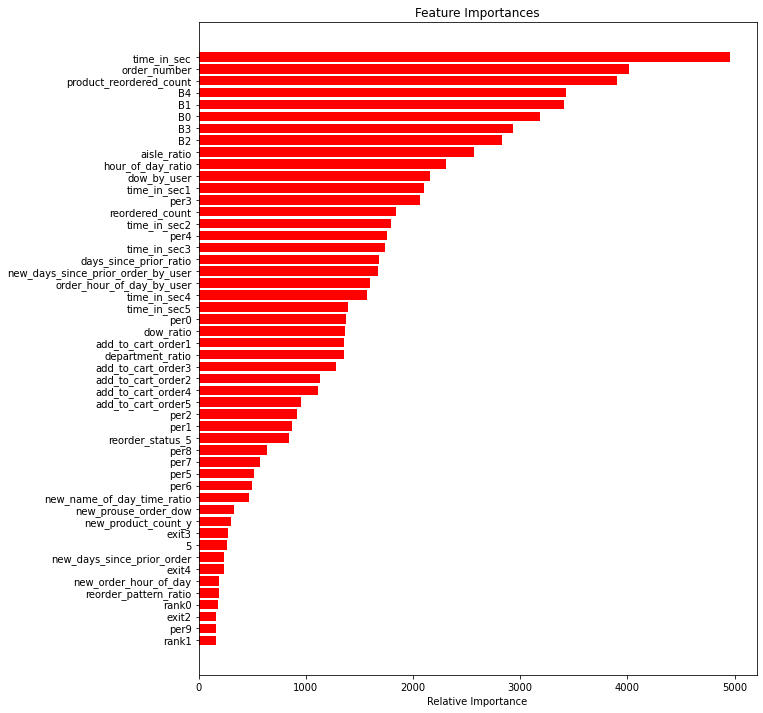

In [ ]:
features = X_train.columns
importances = lgbm.feature_importances_
indices = (np.argsort(importances))[-50:]
#indices = (np.argsort(importances))
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# save the model to disk
import pickle
filename = 'finalized_model5.sav'
pickle.dump(lgbm, open(filename, 'wb'))

##Applying AdaBoost Classifier

In [ ]:
ada=AdaBoostClassifier()
prams={
    'learning_rate':[0.01,0.1,0.2,0.3],
     'n_estimators':[50,100,150,200]

}
ada_cfl1=RandomizedSearchCV(ada,param_distributions=prams,scoring='f1',return_train_score=True,cv=3)
ada_cfl1.fit(X_train,y_train)
ada_cfl1.best_params_

{'learning_rate': 0.3, 'n_estimators': 200}

In [10]:
ada=AdaBoostClassifier(learning_rate=0.3,n_estimators=200)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.3,
                   n_estimators=200, random_state=None)

In [11]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,ada.predict(X_train)))
print('Test f1 score',f1_score(y_test,ada.predict(X_test)))

Train f1 score 0.28876764091886575
Test f1 score 0.2879884667101013


Train confusion_matrix


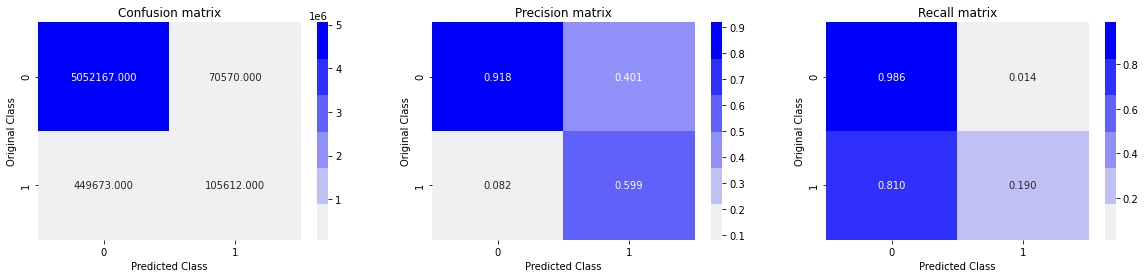

Test confusion_matrix


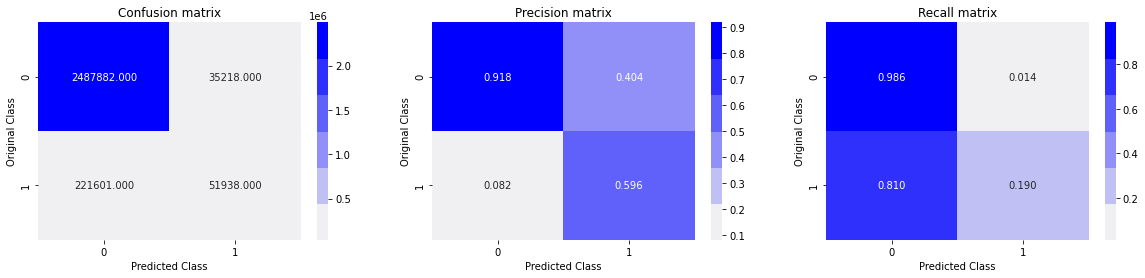

In [14]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,ada.predict(X_train))
print('Test confusion_matrix')
plot_confusion_matrix(y_test,ada.predict(X_test))

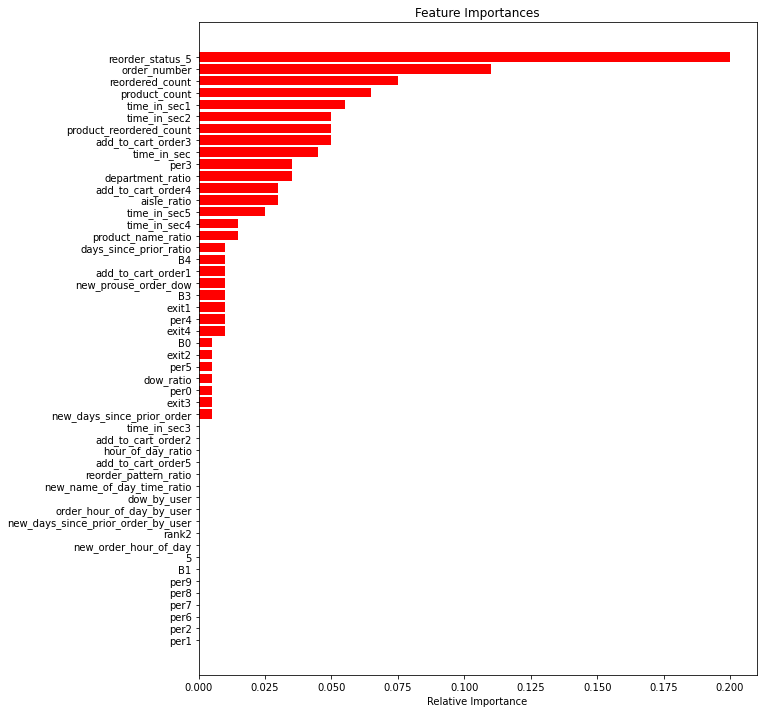

In [15]:
features = X_train.columns
importances = ada.feature_importances_
indices = (np.argsort(importances))[-50:]
#indices = (np.argsort(importances))
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
# save the model to disk
import pickle
filename = 'finalized_model6.sav'
pickle.dump(ada, open(filename, 'wb'))

##Applying MLP architecture

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)


In [12]:
input_layer = Input(shape=(X_train.shape[1],1),dtype=float )
con1 = Conv1D(filters=5, kernel_size=3, activation='relu')(input_layer)
con2 = Conv1D(filters=2, kernel_size=2, activation='relu')(con1)
flatten = Flatten()(con2)
drop_out = Dropout(0.2)(flatten)

dense1 = Dense(40, activation='relu')(drop_out)

Out = Dense(units=2,activation='softmax')(dense1)

#Creating a model
model = Model(inputs=input_layer,outputs=Out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 66, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 64, 5)             20        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 63, 2)             22        
_________________________________________________________________
flatten (Flatten)            (None, 126)               0         
_________________________________________________________________
dropout (Dropout)            (None, 126)               0         
_________________________________________________________________
dense (Dense)                (None, 40)                5080      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 82    

In [13]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics='accuracy')

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5678022, 66), (2796639, 66), (5678022, 2), (2796639, 2))

In [14]:
from sklearn.metrics import f1_score
class f1_score_and_auc_Callback(tf.keras.callbacks.Callback):

    def  on_train_begin(self,logs={}):
      self.f1_micro=[]


    def on_epoch_end(self, epoch, logs=None):
      y_pred=self.model.predict(X_test).round()
      y_true=y_test
      score=f1_score(y_true, y_pred, average=None)
      self.f1_micro.append(score)
      print(" F1 score :",score)

metrics=f1_score_and_auc_Callback()

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="model_save/model.{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

In [16]:
callbacks_list = [checkpoint,metrics]

In [17]:
model.fit(x=[X_train],y=y_train,validation_data=([X_test],y_test),
            epochs=5,batch_size=100,steps_per_epoch=len(X_train)//100,callbacks=callbacks_list)

Epoch 1/5
56780/56780 [==============================] - 256s 4ms/step - loss: 153.8798 - accuracy: 0.8997 - val_loss: 0.2564 - val_accuracy: 0.9066

Epoch 00001: val_accuracy improved from -inf to 0.90661, saving model to model_save/model.01-0.91.h5
 F1 score : [0.95041716 0.19890679]
Epoch 2/5
56780/56780 [==============================] - 225s 4ms/step - loss: 0.2579 - accuracy: 0.9063 - val_loss: 0.2552 - val_accuracy: 0.9069

Epoch 00002: val_accuracy improved from 0.90661 to 0.90692, saving model to model_save/model.02-0.91.h5
 F1 score : [0.95047168 0.22850724]
Epoch 3/5
56780/56780 [==============================] - 224s 4ms/step - loss: 0.2567 - accuracy: 0.9064 - val_loss: 0.2549 - val_accuracy: 0.9070

Epoch 00003: val_accuracy improved from 0.90692 to 0.90705, saving model to model_save/model.03-0.91.h5
 F1 score : [0.95058718 0.21763298]
Epoch 4/5
56780/56780 [==============================] - 225s 4ms/step - loss: 0.2562 - accuracy: 0.9065 - val_loss: 0.2550 - val_accurac

# Submmision file

In [ ]:
all_model = ['finalized_model1.sav','finalized_model2.sav','finalized_model3.sav','finalized_model4.sav',
            'finalized_model5.sav','finalized_model6.sav','model.03-0.91.h5']

In [ ]:
sub = test_df[name]
sub_X = sub.fillna(0)
for i in range(7):
    if i != 6 :
      filename = all_model[i]
      loaded_model = pickle.load(open(filename, 'rb'))
       pred=loaded_model.predict(sub_X)
    else :
      filename = all_model[i]
      load_model(filename)
      pred=loaded_model.predict(sub_X).round()
      pred = [np.argmax(j) for j in pred]

    sub_data = test_df[['order_id','product_id']]
    sub_data['label'] = pred

    order_unique = list(set(sub_data['order_id'].values))
    product_id_num = []
    for i in order_unique:
        li = []
        k = sub_data[(sub_data['order_id'] == i)]
        k = k[(k['label'] == 1)]
        li = list(set( k['product_id'].values))
        product_id_num.append(li) 

    product_id_num = [' '.join(str(e) for e in i)  for i in product_id_num]  

    data = {'order_id':order_unique,'products':product_id_num} 

    final_sub_data = pd.DataFrame(data)  
    
    submission = final_sub_data[['order_id','products']]
    submission = submission.sort_values(by ='order_id')
    submission = submission.fillna('None')
    
    submission.to_csv('submission.csv')
    

# Summary

In [18]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Model", "Hyper parameter", "test f1-Score",'kagggle f1 score']
x.add_row(['logistic regression','C=0.1','0.1730','0.1428'])
x.add_row([' ',' ',' ',' '])
x.add_row(['catboost classifier','learning_rate=0.1,max_depth = 15','0.4382','0.3779'])
x.add_row([' ','n_estimators = 100,class_weights ={0: 1, 1: 4}',' ',' '])
x.add_row([' ',' ',' ',' '])
x.add_row(['Random Forest','n_estimators=250','0.1829','0.1793'])
x.add_row([' ',' ',' ',' '])
x.add_row(['Xgb classifier','learning_rate= 0.3, n_estimators= 200','0.2857','0.2516'])
x.add_row([' ',' ',' ',' '])
x.add_row(['LGBMClassifier','class_weight={0:1,1:4},learning_rate=0.1','0.4418','0.38205'])
x.add_row([' ','max_depth=15,n_estimators=1000,num_leaves=75',' ',' '])
x.add_row([' ',' ',' ',' '])
x.add_row(['AdaBoost Classifier','learning_rate= 0.3, n_estimators= 200','0.2879','0.2539'])
x.add_row([' ',' ',' ',' '])
x.add_row(['MLP Architecture','','0.2176','0.1746'])
print(x)

+---------------------+------------------------------------------------+---------------+------------------+
|        Model        |                Hyper parameter                 | test f1-Score | kagggle f1 score |
+---------------------+------------------------------------------------+---------------+------------------+
| logistic regression |                     C=0.1                      |     0.1730    |      0.1428      |
|                     |                                                |               |                  |
| catboost classifier |        learning_rate=0.1,max_depth = 15        |     0.4382    |      0.3779      |
|                     | n_estimators = 100,class_weights ={0: 1, 1: 4} |               |                  |
|                     |                                                |               |                  |
|    Random Forest    |                n_estimators=250                |     0.1829    |      0.1793      |
|                     |     

# My submission to kaggle

Out of all model which i have built, apply predict on my test and have look for the kaggle score. i found that LGBMClassifier has given best result.

In [2]:
from PIL import Image 

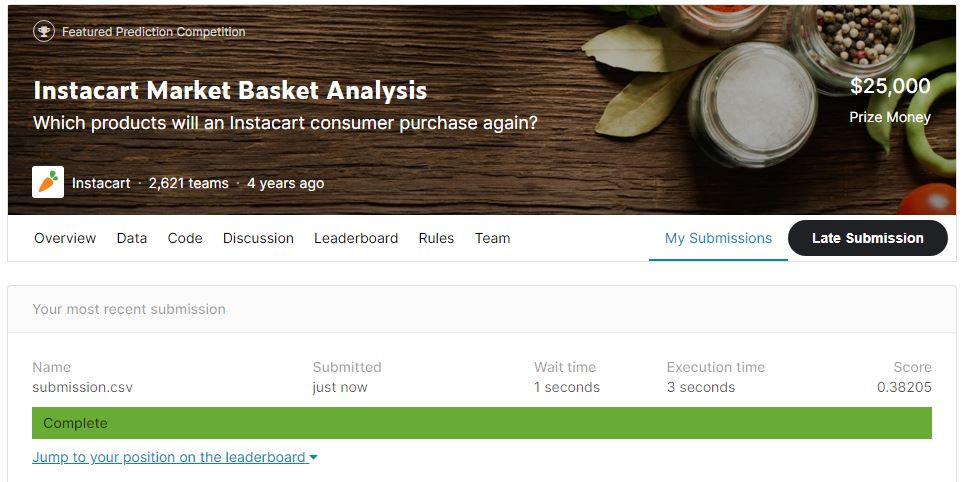

In [3]:
img = Image.open("submission.jpg")
img